In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [329]:
train = pd.read_csv('spaceship-titanic/train.csv', index_col=False)
test = pd.read_csv('spaceship-titanic/test.csv',index_col=False)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [330]:
data = [train,test]

for i in data:
    i['GroupID'], i['IDinGroup'] = (i['PassengerId'].apply(lambda x: x[:4]),
                                    i['PassengerId'].apply(lambda x: x[5:]))
    i.drop('PassengerId', axis=1,inplace=True)
data[0]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,IDinGroup
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01


In [331]:
groped = train.groupby(train['GroupID'])['Transported'].unique()
groped.value_counts()

Transported
[False]          2868
[True]           2552
[True, False]       1
[True, False]       1
[False, True]       1
                 ... 
[True, False]       1
[False, True]       1
[True, False]       1
[True, False]       1
[False, True]       1
Name: count, Length: 799, dtype: int64

In [332]:
train['HomePlanet'].unique()


array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [333]:
for i in data:
    i['HomePlanet'] = i['HomePlanet'].fillna(0)
    i['HomePlanet'] = i['HomePlanet'].map({'Europa': 1,'Earth':2, 'Mars':3, 0:0})


In [334]:
train.groupby('HomePlanet')['Transported'].sum()

HomePlanet
0     103
1    1404
2    1951
3     920
Name: Transported, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

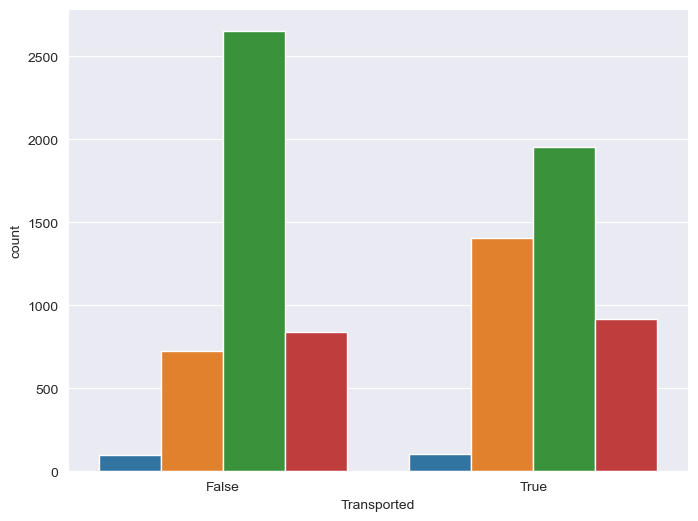

In [335]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.countplot(x='Transported' ,hue='HomePlanet', data=train)
ax.set_ylim(0,2000)
plt.title("Transported vs Planet")
plt.show()

In [ ]:
train.groupby('CryoSleep')['Transported'].sum()

In [ ]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.countplot(x='Transported' ,hue='CryoSleep', data=train)
ax.set_ylim(0,5000)
plt.title("Transported vs Planet")
plt.show()

In [336]:
have_cabin = train[train.Cabin.notna() == True].drop_duplicates(subset=['GroupID'])
no_cabin = train[train.Cabin.isna() == True]
new = no_cabin[['Cabin', 'GroupID']].merge(have_cabin[['Cabin', 'GroupID']], on='GroupID', how='inner')
new

,Cabin_x,GroupID,Cabin_y
0,NaN,0110,B/5/P
1,NaN,0244,F/47/S
2,NaN,0278,G/45/P
3,NaN,0287,B/12/P
4,NaN,0348,D/12/P
...,...,...,...
95,NaN,8770,F/1808/P
96,NaN,8772,B/339/S
97,NaN,9057,B/296/P
98,NaN,9069,B/297/P
